  0%|          | 0/1034 [00:00<?, ?it/s]

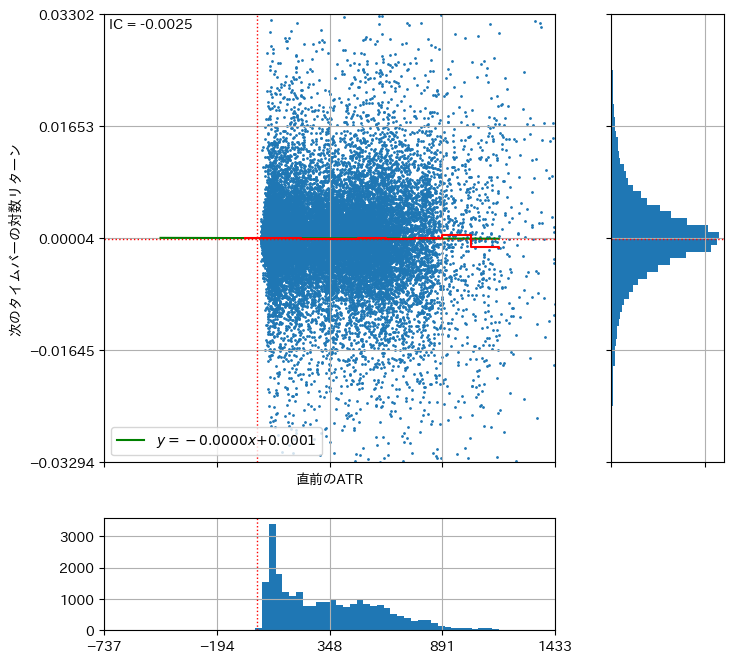

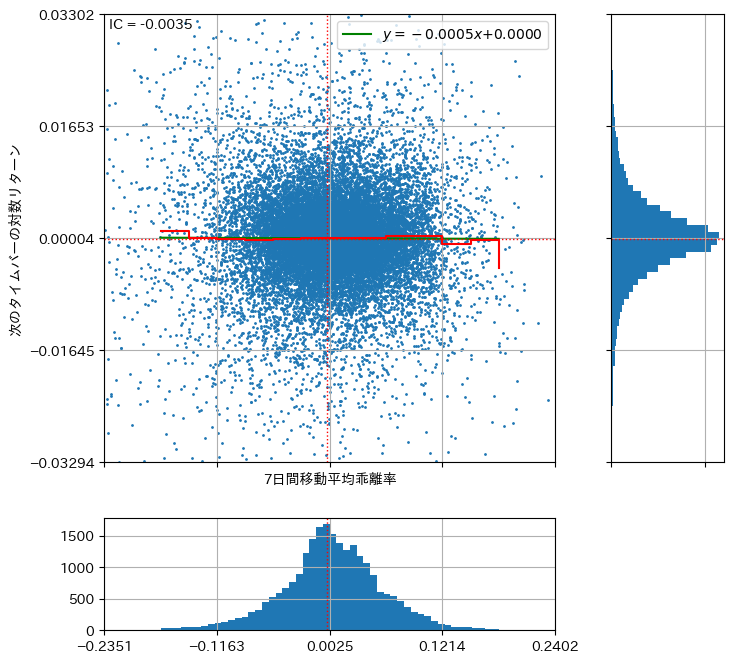

In [9]:
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import japanize_matplotlib
from tqdm.auto import tqdm
import talib

import exercise_util

#target_symbols = list(exercise_util.target_symbols.keys())
target_symbols = ['BTCUSDT']

str_start = '2020-01-01'
_symbol = target_symbols[0]

df_timebar = exercise_util.concat_timebar_files(_symbol, 3600, str_start)

df_timebar['lr'] =  np.log(df_timebar['close']) - np.log(df_timebar['close'].shift(1))
df_timebar['lr_future'] = df_timebar['lr'].shift(-1)
df_timebar['close_7days_mean'] = df_timebar['close'].rolling(7 * 24).mean()
df_timebar['close_7days_mean_deviation'] = np.log(df_timebar['close']) - np.log(df_timebar['close_7days_mean'])
df_timebar['atr'] = talib.ATR(df_timebar['high'], df_timebar['low'], df_timebar['close'], 24)
df_timebar['previous_atr'] = df_timebar['atr'].shift(1)
df_timebar.dropna(inplace = True)

exercise_util.show_correlation(df_timebar['previous_atr'], df_timebar['lr_future'], xaxis_label = '直前のATR', yaxis_label = '次のタイムバーの対数リターン')
exercise_util.show_correlation(df_timebar['close_7days_mean_deviation'], df_timebar['lr_future'], xaxis_label = '7日間移動平均乖離率', yaxis_label = '次のタイムバーの対数リターン')